In [2]:
%pip install PyOpenGL PyOpenGL_accelerate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jhues.DESKTOP-HTEB9IB\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
import OpenGL.GL
import OpenGL.GLUT
import OpenGL.GLU

In [5]:
def showScreen():
    OpenGL.GLUT.glClear(OpenGL.GLUT.GL_COLOR_BUFFER_BIT | OpenGL.GLUT.GL_DEPTH_BUFFER_BIT) # Remove everything from screen (i.e. displays all white)

OpenGL.GLUT.glutInit() # Initialize a glut instance which will allow us to customize our window
OpenGL.GLUT.glutInitDisplayMode(OpenGL.GLUT.GLUT_RGBA) # Set the display mode to be colored
OpenGL.GLUT.glutInitWindowSize(500, 500)   # Set the width and height of your window
OpenGL.GLUT.glutInitWindowPosition(0, 0)   # Set the position at which this windows should appear
wind = OpenGL.GLUT.glutCreateWindow("OpenGL Coding Practice") # Give your window a title
OpenGL.GLUT.glutDisplayFunc(showScreen)  # Tell OpenGL to call the showScreen method continuously
OpenGL.GLUT.glutIdleFunc(showScreen)     # Draw any graphics or shapes in the showScreen function at all times
OpenGL.GLUT.glutMainLoop()  # Keeps the window created above displaying/running in a loop

NullFunctionError: Attempt to call an undefined function glutInit, check for bool(glutInit) before calling

In [6]:
OpenGL.GLUT.glutInit()

()

In [9]:
OpenGL.GLUT.glutInitDisplayMode()

NullFunctionError: Attempt to call an undefined function glutInitDisplayMode, check for bool(glutInitDisplayMode) before calling

In [11]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\jhues.DESKTOP-HTEB9IB\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [68]:
from matplotlib import patches, cm, lines
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def make_fig():

In [81]:
def make_mandala(ax, bgv,cmap_name=None,size_mod=None):
    ax.axis('off')
    ax.set_aspect('equal')
    if cmap_name ==None:
        cmap_name = np.random.choice(['hsv', 'viridis', 'twilight', 'coolwarm', 'rainbow_r', 'PiYG', 'cool', 'winter', 'spring' , 'summer', 'autumn', 'PRGn'])
    else: 
        cmap_name = cmap_name
    n_axes = len(bgv)
    center = (np.mean([v[0] for v in bgv]),np.mean([v[1] for v in bgv]))
    bgr = ((center[0]-bgv[0][0])**2+(center[1]-bgv[0][1])**2)**.5
    bghw = ((center[0]-(bgv[0][0]+bgv[1][0])/2)**2+(center[1]-(bgv[0][1]+bgv[1][1])/2)**2)**.5
    bg = patches.Polygon(bgv, closed=True, color = 'black')
    ax.add_patch(bg)
    cmap = cm.get_cmap(cmap_name)
    c0 = patches.Arc(center, .05,.05 , color=cmap(0))
    c0.set_lw(np.random.randint(2,5))
    ax.add_patch(c0)
    n = np.random.randint(4,10)
    for i in range(1,n):
        d = (i/n)*bghw*2
        ornament_space = np.random.rand()*.015*bghw*2+.01*bghw*2
        max_minors = round((d*30),0)
        if max_minors == 0:
            n_minors = 0
        else:
            n_minors = np.random.randint(0,max_minors)
        n_ornaments = n_axes*(1+n_minors)
        ornament_type = np.random.choice(['circle', 'triangle' ,'square'])
        ornament_theta = np.arcsin(ornament_space/(d/2))*(180/np.pi)
        #print("ornament theta valid: {nancheck}, arcsin args: {arcsinargs}, ornament space: {ospace}, d: {d}".format(**{'nancheck':math.isnan(ornament_theta)==False, 'arcsinargs':ornament_space/(d/2),"ospace":ornament_space,"d":d}))
        len_arc = 360/n_ornaments
        ornament_lw = np.random.randint(2,5)
        ornament_alpha = .7
        ornament_color = cmap(d)
        ornament_growth = np.random.rand()
        bg_rotation = 90
        if n_axes==4:
            bg_rotation =45
        for j in range(n_ornaments):
            if n_minors==0:
                ornament_size=.025*bghw+ornament_growth*(bgr-d/2-.03*bghw)            
            elif (j+1)%(n_minors+1) == 0:
                ornament_size=.025*bghw+ornament_growth*(bgr-d/2-.03*bghw)
            else:
                ornament_size=.025*bghw+ornament_growth*(bghw-d/2-.03*bghw)
            o_d = ((d/2)**2-(ornament_space/2)**2)**.5 + ((ornament_size/2)**2-(ornament_space/2)**2)**.5
            theta1 = j*len_arc+ornament_theta+bg_rotation
            theta2 = (j+1)*len_arc-ornament_theta+bg_rotation
            c = patches.Arc(center, d,d, theta1=theta1, theta2=theta2, alpha=ornament_alpha, color = ornament_color)
            c.set_lw(ornament_lw)
            c.set
            ax.add_patch(c)
            if ornament_type == 'circle':
                max_circle = ((bgr-d/2)/2+abs(np.sin(2*np.pi/n_axes))*(bgr-d/2)/2)/2
                if ornament_size>max_circle:
                    ornament_size = max_circle
                o_d = ((d/2)**2-(ornament_space/2)**2)**.5 + ((ornament_size/2)**2-(ornament_space/2)**2)**.5
                o_angle = (theta2+ornament_theta)*np.pi/180
                o_center = (center[0]+np.cos(o_angle)*o_d,center[1]+np.sin(o_angle)*o_d)
                o_theta1 = 180 + o_angle*(180/np.pi) + np.arcsin(ornament_space/ornament_size)*(180/np.pi)
                o_theta2 = 180 + o_angle*(180/np.pi) - np.arcsin(ornament_space/ornament_size)*(180/np.pi)
                o = patches.Arc(o_center, ornament_size, ornament_size, theta1 = o_theta1, theta2 = o_theta2 , alpha=ornament_alpha, color = ornament_color)
                o.set_lw(ornament_lw)
                ax.add_patch(o)
            if ornament_type == 'triangle':
                o_angle = (theta2+ornament_theta)*np.pi/180
                v1 = (center[0]+np.cos(theta2*np.pi/180)*d/2, center[1]+np.sin(theta2*np.pi/180)*d/2)
                v3 = (center[0]+np.cos(theta2*np.pi/180+2*ornament_theta*np.pi/180)*d/2, center[1]+np.sin(theta2*np.pi/180+2*ornament_theta*np.pi/180)*d/2)
                v2 = (center[0]+ np.cos(o_angle)*(d/2+ornament_size), center[1]+ np.sin(o_angle)*(d/2+ornament_size))
                s_vertices = [v1,v2,v3]
                s = lines.Line2D([c[0] for c in s_vertices], [c[1] for c in s_vertices], color = ornament_color, alpha=ornament_alpha) 
                s.set_lw(ornament_lw)
                ax.add_line(s)  
            if ornament_type == 'square': 
                #max_rectangle = 
                o_angle = (theta2+ornament_theta)*np.pi/180
                h_increment = np.cos(o_angle)*ornament_size
                v_increment = np.sin(o_angle)*ornament_size
                v1 = (center[0]+np.cos(theta2*np.pi/180)*d/2, center[1]+np.sin(theta2*np.pi/180)*d/2)
                v4 = (center[0]+np.cos(theta2*np.pi/180+2*ornament_theta*np.pi/180)*d/2, center[1]+np.sin(theta2*np.pi/180+2*ornament_theta*np.pi/180)*d/2)
                v2 = (v1[0]+h_increment, v1[1]+v_increment)
                v3 = (v4[0]+h_increment, v4[1]+v_increment)
                s_vertices = [v1,v2,v3,v4]
                s = lines.Line2D([c[0] for c in s_vertices], [c[1] for c in s_vertices], color = ornament_color, alpha=ornament_alpha) 
                s.set_lw(ornament_lw)
                ax.add_line(s)                      


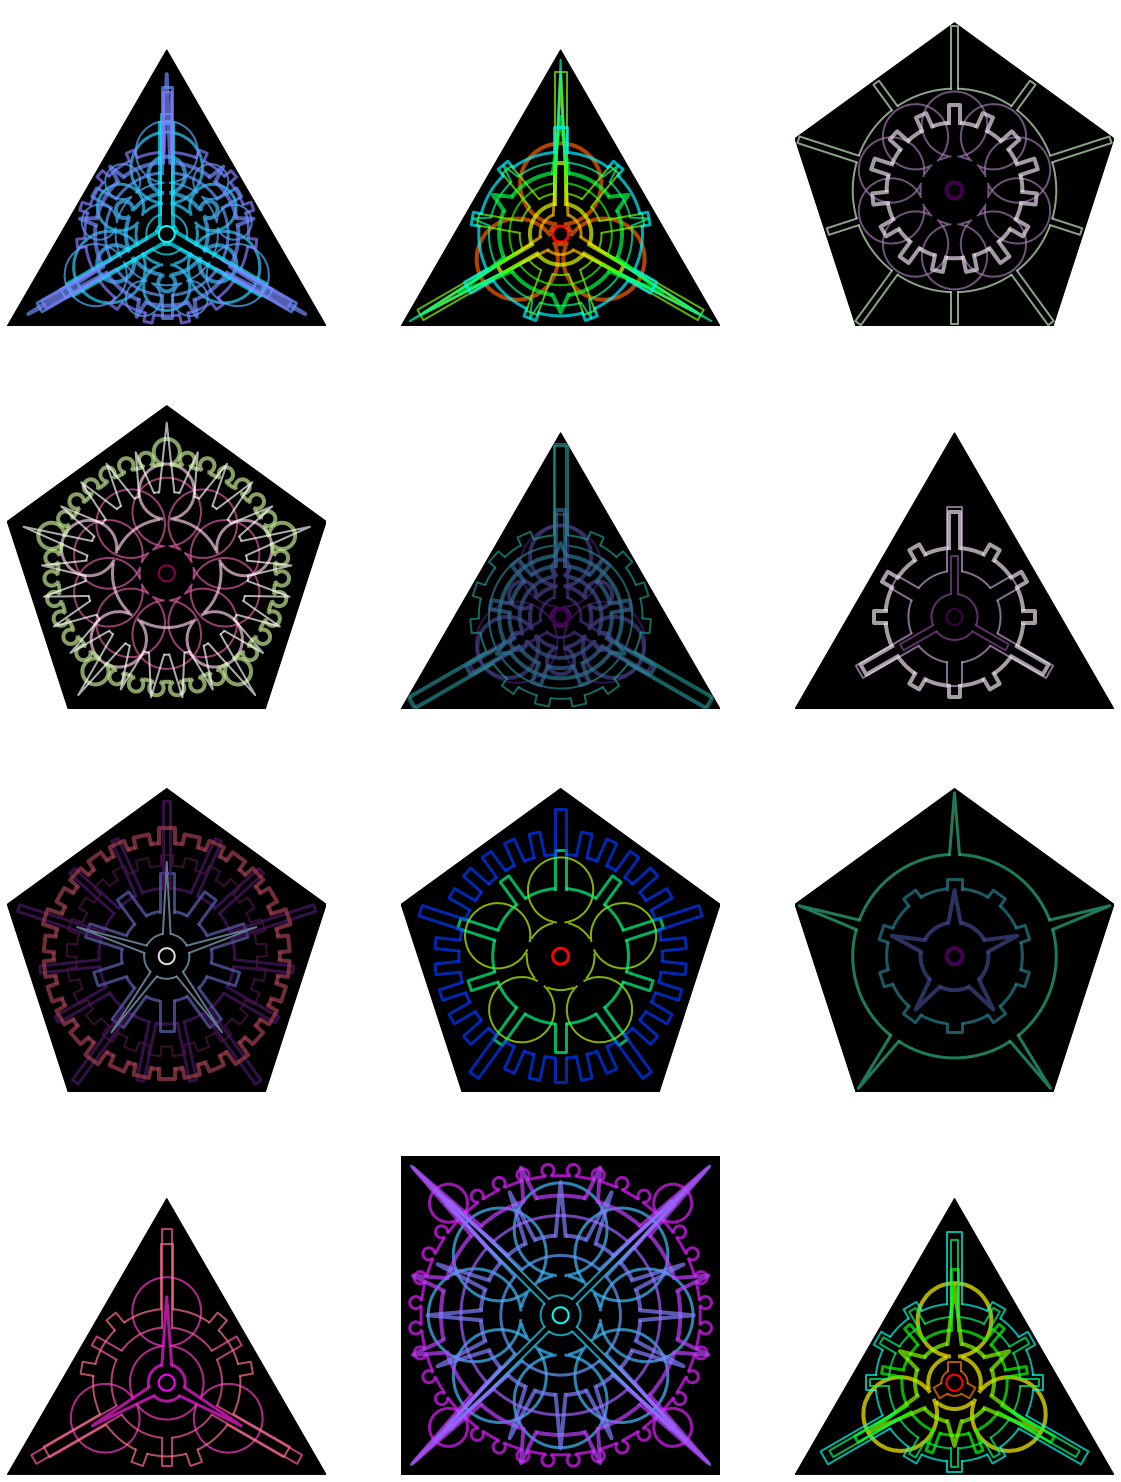

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
nrow = 4
ncol = 3
fig, axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches((20,27))
shapes = [[(0,0),(0,1),(1,1),(1,0)],[(0,0),(.5,.866),(1,0)], [(.191,0),(0,.588),(.5,.951),(1,.588),(.809,0)]]

for ax in axs.reshape(-1):
    shape_index = np.random.randint(0, len(shapes))
    bgv = shapes[shape_index]
    make_mandala(ax,bgv)

plt.show()



In [31]:
def relocate(coords, new_vertex):
    new_coords = []
    for coord in coords:
        new_coords.append([coord[0]+new_vertex[0], coord[1]+new_vertex[1]])
    return new_coords

In [32]:
square_shape = [[0,0], [0,.25], [.25,.25], [.25,0]]

In [53]:
cross_vertices = [[.375,0], [.375,.25], [.375,.5], [.375,.75], [.125,.5], [.625,.5]]

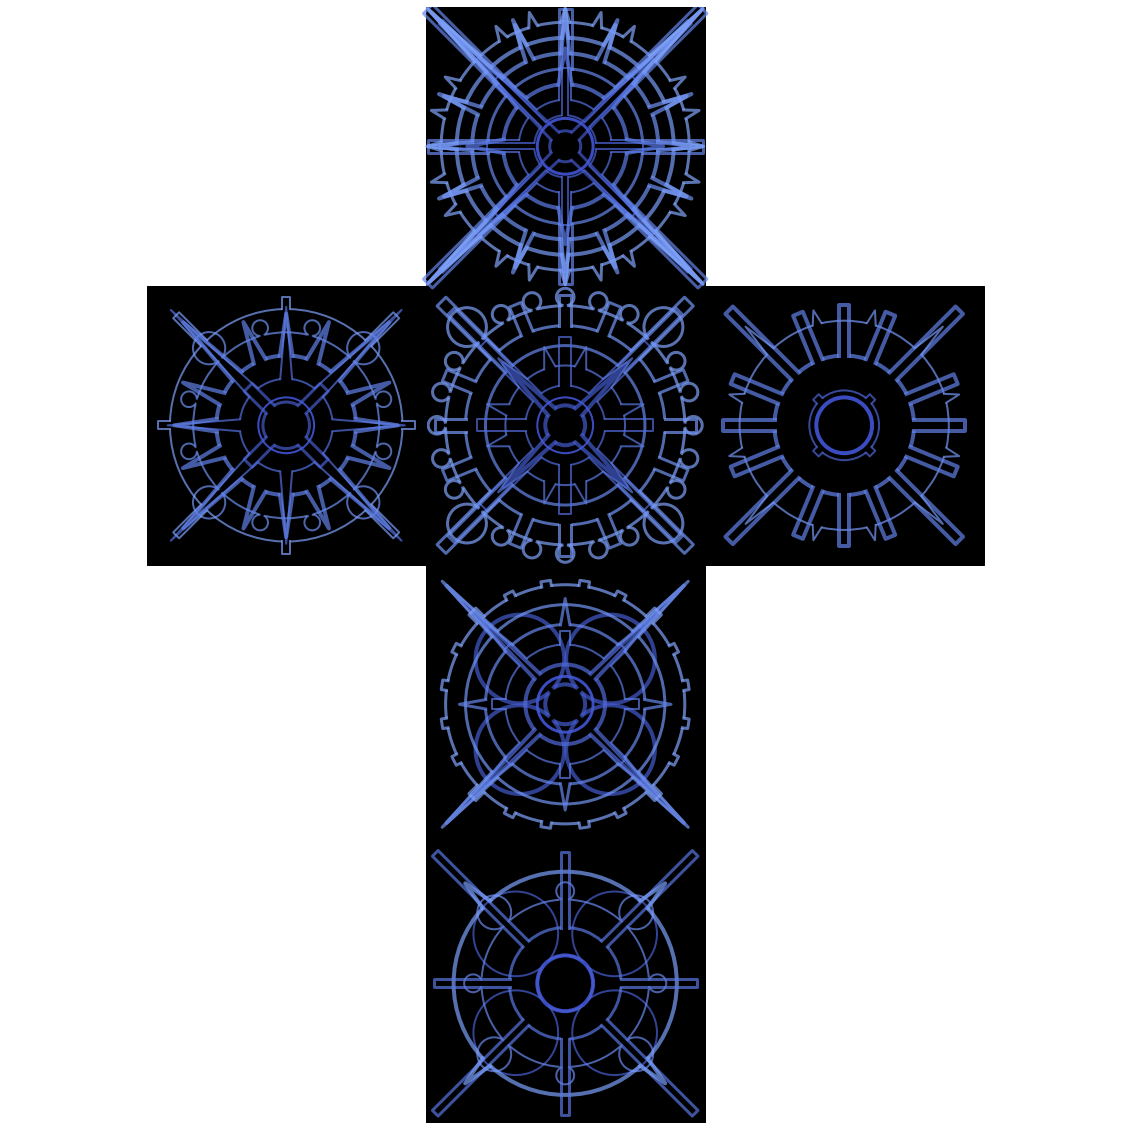

In [89]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
fig.set_size_inches((20,27))
for vertex in cross_vertices:
    bgv = relocate(square_shape, vertex)
    make_mandala(ax,bgv, cmap_name = 'coolwarm')
plt.savefig('yourimage.jpg')
plt.show()

In [10]:

# noinspection PyUnresolvedReferences
import vtkmodules.vtkInteractionStyle
# noinspection PyUnresolvedReferences
import vtkmodules.vtkRenderingOpenGL2
from vtkmodules.vtkCommonColor import vtkNamedColors
from vtkmodules.vtkCommonDataModel import vtkPolyhedron
from vtkmodules.vtkRenderingCore import (
    vtkActor,
    vtkPolyDataMapper,
    vtkRenderWindow,
    vtkRenderWindowInteractor,
    vtkRenderer
)


def main():
    colors = vtkNamedColors()

    dodecahedron = MakeDodecahedron()

    # Visualize
    mapper = vtkPolyDataMapper()
    mapper.SetInputData(dodecahedron.GetPolyData())

    actor = vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(
        colors.GetColor3d('PapayaWhip'))

    renderer = vtkRenderer()
    renderWindow = vtkRenderWindow()
    renderWindow.SetWindowName('Dodecahedron')
    renderWindow.AddRenderer(renderer)
    renderWindowInteractor = vtkRenderWindowInteractor()
    renderWindowInteractor.SetRenderWindow(renderWindow)

    renderer.AddActor(actor)
    renderer.SetBackground(colors.GetColor3d('CadetBlue'))
    renderer.GetActiveCamera().Azimuth(30)
    renderer.GetActiveCamera().Elevation(30)

    renderer.ResetCamera()

    renderWindow.Render()
    renderWindowInteractor.Start()


def MakeDodecahedron():
    aDodecahedron = vtkPolyhedron()

    for i in range(0, 20):
        aDodecahedron.GetPointIds().InsertNextId(i)

    aDodecahedron.GetPoints().InsertNextPoint(1.21412, 0, 1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(0.375185, 1.1547, 1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(-0.982247, 0.713644, 1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(-0.982247, -0.713644, 1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(0.375185, -1.1547, 1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(1.96449, 0, 0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(0.607062, 1.86835, 0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(-1.58931, 1.1547, 0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(-1.58931, -1.1547, 0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(0.607062, -1.86835, 0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(1.58931, 1.1547, -0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(-0.607062, 1.86835, -0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(-1.96449, 0, -0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(-0.607062, -1.86835, -0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(1.58931, -1.1547, -0.375185)
    aDodecahedron.GetPoints().InsertNextPoint(0.982247, 0.713644, -1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(-0.375185, 1.1547, -1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(-1.21412, 0, -1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(-0.375185, -1.1547, -1.58931)
    aDodecahedron.GetPoints().InsertNextPoint(0.982247, -0.713644, -1.58931)

    faces = [12,  # number of faces
             5, 0, 1, 2, 3, 4,  # number of ids on face, ids
             5, 0, 5, 10, 6, 1,
             5, 1, 6, 11, 7, 2,
             5, 2, 7, 12, 8, 3,
             5, 3, 8, 13, 9, 4,
             5, 4, 9, 14, 5, 0,
             5, 15, 10, 5, 14, 19,
             5, 16, 11, 6, 10, 15,
             5, 17, 12, 7, 11, 16,
             5, 18, 13, 8, 12, 17,
             5, 19, 14, 9, 13, 18,
             5, 19, 18, 17, 16, 15]

    aDodecahedron.SetFaces(faces)
    aDodecahedron.Initialize()

    return aDodecahedron


main()

In [91]:
# Create a render window
ren = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
renWin.SetSize(480,480)
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Generate a cube 
cube = vtk.vtkCubeSource()

# Read the image data from a file
reader = vtk.vtkJPEGReader()
reader.SetFileName("yourimage.jpg")

# Create texture object
texture = vtk.vtkTexture()
texture.SetInputConnection(reader.GetOutputPort())

#Map texture coordinates
map_to_plane = vtk.vtkTextureMapToBox()
map_to_plane.SetInputConnection(cube.GetOutputPort())

# Create mapper and set the mapped texture as input
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(map_to_plane.GetOutputPort())

# Create actor and set the mapper and the texture
actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.SetTexture(texture)

ren.AddActor(actor)

iren.Initialize()
renWin.Render()
iren.Start()

AttributeError: module 'vtkmodules.all' has no attribute 'vtkTextureMapToBox'

In [86]:
import vtk